## KDM Method vs Chronological Age, Predicting Mortality (2016)

In [655]:
import pandas as pd
import numpy as np

In [656]:
# load mortality file
m_file = 'NHANES_mortality.csv'
mortstat = pd.read_csv(m_file)
print(mortstat.shape)
mortstat.head(n=10)

(33994, 16)


,SEQN,ELIGSTAT,MORTSTAT,CAUSEAVL,UCOD_LEADING,DIABETES,HYPERTEN,PERMTH_INT,PERMTH_EXM,MORTSRCE_NDI,MORTSRCE_CMS,MORTSRCE_SSA,MORTSRCE_DC,MORTSRCE_DCL,DODQTR,DODYEAR
0,3,1,0.0,NaN,NaN,NaN,NaN,262.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,0.0,NaN,NaN,NaN,NaN,261.0,260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1,0.0,NaN,NaN,NaN,NaN,261.0,261.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1,0.0,NaN,NaN,NaN,NaN,256.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11,1,1.0,1.0,7.0,1.0,0.0,206.0,206.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,12,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,16,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [657]:
# load BA file
t_file = 'test2.csv'
BA = pd.read_csv(t_file)
BA.head(n=10)

,seqn,bup,tcp,crp,cep,appsi,amp,ghp,age,samp_wt,cmvod,fev,female,wbc,sbp,fvc,fev_fvc,BA,BAC
0,4.0,11.0,160.0,0.21,0.7,89.0,4.1,4.6,32.0,0.183278,0.517,3089.0,1.0,12.55,126.0,3536.0,0.873586,33.102727,32.107276
1,9.0,14.0,236.0,0.21,0.8,59.0,4.0,5.3,48.0,2.066707,1.946,2512.0,1.0,4.95,131.0,3436.0,0.731083,52.391256,48.427192
2,10.0,14.0,225.0,0.21,1.2,74.0,4.5,4.6,35.0,2.950445,0.349,3911.0,0.0,5.90,130.0,4630.0,0.844708,36.607949,35.160278
3,19.0,10.0,187.0,0.21,1.1,86.0,4.2,5.7,44.0,0.410218,3.001,2594.0,0.0,6.10,133.0,4080.0,0.635784,67.560946,46.348518
4,34.0,15.0,216.0,0.21,0.8,84.0,3.9,5.5,42.0,0.534605,3.001,2331.0,1.0,5.05,100.0,2850.0,0.817895,50.785393,42.854665
5,48.0,10.0,156.0,1.54,1.0,69.0,3.7,5.0,56.0,2.860106,3.001,2478.0,1.0,8.85,128.0,3375.0,0.734222,48.970407,55.316144
6,51.0,15.0,162.0,0.21,1.2,91.0,4.5,5.5,44.0,0.290115,3.001,3445.0,0.0,7.00,130.0,4283.0,0.804343,50.041880,44.602245
7,52.0,11.0,244.0,0.21,1.2,67.0,4.3,5.9,50.0,0.148594,2.509,4658.0,0.0,6.85,117.0,5514.0,0.844759,29.472378,47.953839
8,55.0,13.0,212.0,0.21,1.0,84.0,4.5,5.7,48.0,0.085426,2.417,3960.0,0.0,7.45,155.0,4629.0,0.855476,46.117295,47.812335
9,63.0,14.0,202.0,0.44,1.0,79.0,3.5,6.2,66.0,0.527590,3.001,1903.0,1.0,6.60,137.0,2487.0,0.765179,66.994303,66.096728


In [658]:
# filter mortstat

mortstat = mortstat.loc[mortstat['ELIGSTAT'] == 1]
mortstat = mortstat.loc[(mortstat['MORTSTAT'] == 0) | (mortstat['UCOD_LEADING'] < 112)]
mortstat.head(n=10)

,SEQN,ELIGSTAT,MORTSTAT,CAUSEAVL,UCOD_LEADING,DIABETES,HYPERTEN,PERMTH_INT,PERMTH_EXM,MORTSRCE_NDI,MORTSRCE_CMS,MORTSRCE_SSA,MORTSRCE_DC,MORTSRCE_DCL,DODQTR,DODYEAR
0,3,1,0.0,NaN,NaN,NaN,NaN,262.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1,0.0,NaN,NaN,NaN,NaN,261.0,260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1,0.0,NaN,NaN,NaN,NaN,261.0,261.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1,0.0,NaN,NaN,NaN,NaN,256.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11,1,1.0,1.0,7.0,1.0,0.0,206.0,206.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
10,19,1,1.0,1.0,10.0,0.0,0.0,65.0,65.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
20,34,1,0.0,NaN,NaN,NaN,NaN,258.0,257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,44,1,0.0,NaN,NaN,NaN,NaN,260.0,259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,45,1,0.0,NaN,NaN,NaN,NaN,250.0,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,48,1,0.0,NaN,NaN,NaN,NaN,254.0,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [659]:
from sklearn.metrics import roc_curve, auc

In [660]:
# shrink datasets to only the columns we want
BA = BA[['seqn', 'age', 'BAC', 'samp_wt', 'BA']]
BA['seqn'] = pd.to_numeric(BA['seqn'], downcast='integer')
mortstat = mortstat[['SEQN', 'MORTSTAT']]

In [661]:
# merge on SEQN
merged = pd.merge(BA, mortstat, how='inner', left_on="seqn", right_on="SEQN")

In [662]:
merged = merged[['SEQN','age','BAC', 'BA','MORTSTAT','samp_wt']]
merged.head(n=10)

,SEQN,age,BAC,BA,MORTSTAT,samp_wt
0,4,32.0,32.107276,33.102727,0.0,0.183278
1,9,48.0,48.427192,52.391256,0.0,2.066707
2,10,35.0,35.160278,36.607949,0.0,2.950445
3,19,44.0,46.348518,67.560946,1.0,0.410218
4,34,42.0,42.854665,50.785393,0.0,0.534605
5,48,56.0,55.316144,48.970407,0.0,2.860106
6,51,44.0,44.602245,50.041880,1.0,0.290115
7,52,50.0,47.953839,29.472378,0.0,0.148594
8,55,48.0,47.812335,46.117295,1.0,0.085426
9,63,66.0,66.096728,66.994303,0.0,0.527590


### Result for ages 30-70, with fev, fev_fvc, fvc

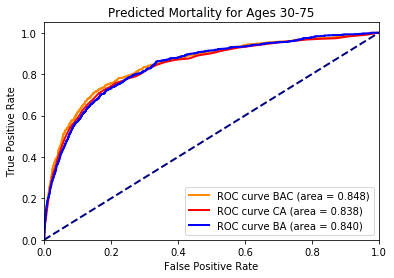

In [663]:
## ROC Curves for full data
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(merged['MORTSTAT'], merged['BAC'], sample_weight=merged['samp_wt'])
roc_auc = auc(fpr, tpr)
fpr2, tpr2, _ = roc_curve(merged['MORTSTAT'], merged['age'], sample_weight=merged['samp_wt'])
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, _ = roc_curve(merged['MORTSTAT'], merged['BA'], sample_weight=merged['samp_wt'])
roc_auc3 = auc(fpr3, tpr3)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve BAC (area = %0.3f)' % roc_auc)
plt.plot(fpr2, tpr2, color='red',
         lw=lw, label='ROC curve CA (area = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='blue',
         lw=lw, label='ROC curve BA (area = %0.3f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Predicted Mortality for Ages 30-75')
plt.legend(loc="lower right")
plt.show()

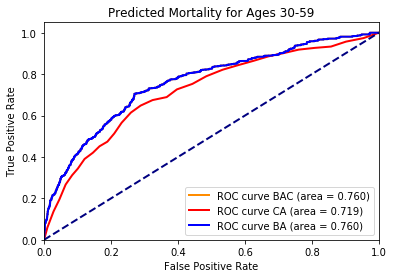

In [664]:
## ROC Curves for ages 30-59
sub_thirty = merged[(merged['age'] >= 30) & (merged['age'] <= 59)]

fpr, tpr, _ = roc_curve(sub_thirty['MORTSTAT'], sub_thirty['BA'], sample_weight=sub_thirty['samp_wt'])
roc_auc = auc(fpr, tpr)
fpr2, tpr2, _ = roc_curve(sub_thirty['MORTSTAT'], sub_thirty['age'], sample_weight=sub_thirty['samp_wt'])
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, _ = roc_curve(sub_thirty['MORTSTAT'], sub_thirty['BA'], sample_weight=sub_thirty['samp_wt'])
roc_auc3 = auc(fpr3, tpr3)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve BAC (area = %0.3f)' % roc_auc)
plt.plot(fpr2, tpr2, color='red',
         lw=lw, label='ROC curve CA (area = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='blue',
         lw=lw, label='ROC curve BA (area = %0.3f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Predicted Mortality for Ages 30-59')
plt.legend(loc="lower right")
plt.show()

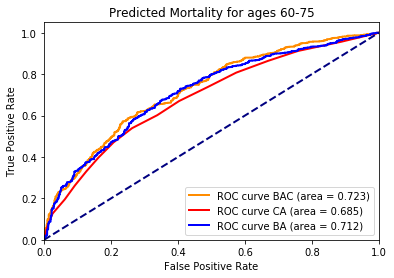

In [665]:
## ROC Curves for >60-75
sub_seventy = merged[(merged['age'] >= 60)]

fpr, tpr, _ = roc_curve(sub_seventy['MORTSTAT'], sub_seventy['BAC'], sample_weight=sub_seventy['samp_wt'])
roc_auc = auc(fpr, tpr)
fpr2, tpr2, _ = roc_curve(sub_seventy['MORTSTAT'], sub_seventy['age'], sample_weight=sub_seventy['samp_wt'])
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, _ = roc_curve(sub_seventy['MORTSTAT'], sub_seventy['BA'], sample_weight=sub_seventy['samp_wt'])
roc_auc3 = auc(fpr3, tpr3)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve BAC (area = %0.3f)' % roc_auc)
plt.plot(fpr2, tpr2, color='red',
         lw=lw, label='ROC curve CA (area = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='blue',
         lw=lw, label='ROC curve BA (area = %0.3f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Predicted Mortality for ages 60-75')
plt.legend(loc="lower right")
plt.show()

In [666]:
# Show us average age and predicted age (BAC)
merged.describe()

,SEQN,age,BAC,BA,MORTSTAT,samp_wt
count,9268.000000,9268.000000,9268.000000,9268.000000,9268.000000,9268.000000
mean,27864.053949,49.586426,49.896064,52.732736,0.291541,1.233466
std,17097.692312,13.540581,13.511157,17.826576,0.454496,1.467423
min,4.000000,30.000000,27.291012,2.822721,0.000000,0.024004
25%,11829.500000,38.000000,37.965080,39.362497,0.000000,0.263412
50%,33275.500000,47.000000,47.703401,51.278955,0.000000,0.559643
75%,43459.750000,62.000000,62.104785,64.875294,1.000000,1.827988
max,53586.000000,75.000000,78.786806,129.501654,1.000000,14.847541


## Original File

In [667]:
file = 'BioAgeSample_NHANESIII_without_fvc.txt'
orig = pd.read_csv(file, delimiter = '\t')

In [668]:
# full file
orig = orig[(orig['age'] >= 30) | (orig['age'] <= 70)]
orig.describe()

,seqn,bup,tcp,crp,cep,appsi,amp,ghp,age,samp_wt,cmvod,fev,female,wbc,sbp,fvc
count,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10411.000000,10527.000000,10527.000000
mean,27832.696590,14.829296,211.780849,0.504266,1.101406,87.857129,4.108027,5.671663,53.323929,1.156038,2.161198,2771.627054,0.533010,7.205076,128.799943,3608.911561
std,17080.647548,5.743787,44.031646,0.851864,0.394846,34.055022,0.356974,1.201177,16.385948,1.407193,1.026019,901.321103,0.498933,2.372782,19.965177,1090.278078
min,4.000000,2.000000,74.000000,0.210000,0.300000,17.000000,2.000000,2.800000,30.000000,0.024004,0.080000,104.000000,0.000000,2.100000,80.000000,368.000000
25%,11866.000000,11.000000,182.000000,0.210000,0.900000,68.000000,3.900000,5.100000,39.000000,0.264890,1.512500,2139.000000,0.000000,5.700000,114.000000,2849.500000
50%,33205.000000,14.000000,208.000000,0.210000,1.100000,83.000000,4.100000,5.400000,51.000000,0.526263,2.671000,2729.000000,1.000000,6.850000,125.000000,3532.000000
75%,43403.000000,17.000000,238.000000,0.500000,1.200000,101.000000,4.300000,5.800000,67.000000,1.684218,3.001000,3358.000000,1.000000,8.300000,140.000000,4328.000000
max,53616.000000,86.000000,518.000000,25.200001,13.900000,952.000000,5.700000,16.100000,90.000000,14.847541,3.001000,6221.000000,1.000000,71.349998,244.000000,7748.000000


In [669]:
# aged 30-59
orig_group1 = orig[(orig['age'] >= 30) & (orig['age'] <= 59)]
orig_group1.describe()

,seqn,bup,tcp,crp,cep,appsi,amp,ghp,age,samp_wt,cmvod,fev,female,wbc,sbp,fvc
count,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6467.000000,6538.000000,6538.000000
mean,27802.954726,13.186907,205.198685,0.459174,1.048149,83.882533,4.147660,5.506669,42.254359,1.375846,2.001576,3124.684154,0.546344,7.217203,121.279596,3947.702967
std,17042.518792,4.452967,42.111039,0.682516,0.344600,31.483736,0.363264,1.132990,8.380977,1.640705,1.084005,811.668495,0.497886,2.201262,15.801841,1012.507447
min,4.000000,2.000000,79.000000,0.210000,0.300000,17.000000,2.000000,3.200000,30.000000,0.074521,0.080000,278.000000,0.000000,2.100000,81.000000,700.000000
25%,11892.250000,10.000000,177.000000,0.210000,0.900000,65.000000,3.900000,5.000000,35.000000,0.283318,0.889000,2565.000000,0.000000,5.650000,110.000000,3217.000000
50%,33224.500000,13.000000,201.000000,0.210000,1.000000,80.000000,4.100000,5.300000,41.000000,0.539961,2.434000,3056.000000,1.000000,6.900000,119.000000,3843.000000
75%,43304.750000,16.000000,230.000000,0.440000,1.200000,96.000000,4.400000,5.700000,49.000000,2.107242,3.001000,3663.000000,1.000000,8.400000,129.000000,4624.000000
max,53586.000000,86.000000,491.000000,12.400000,12.100000,952.000000,5.500000,15.700000,59.000000,14.847541,3.001000,6221.000000,1.000000,20.850000,220.000000,7748.000000


In [670]:
# aged 60-75
orig_group2 = orig[(orig['age'] >= 60) & (orig['age'] <= 75)]
orig_group2.describe()

,seqn,bup,tcp,crp,cep,appsi,amp,ghp,age,samp_wt,cmvod,fev,female,wbc,sbp,fvc
count,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2726.000000,2763.000000,2763.000000
mean,28092.153818,16.671734,224.481723,0.589106,1.162722,93.958379,4.056316,5.999602,67.019182,0.893010,2.381847,2334.302932,0.495838,7.128778,138.821571,3231.737604
std,17237.905817,6.131827,44.435896,1.122617,0.471075,34.609523,0.344900,1.355266,4.529890,0.859491,0.885804,715.329385,0.500073,2.619620,19.251706,959.187096
min,63.000000,2.000000,94.000000,0.210000,0.600000,23.000000,2.400000,3.300000,60.000000,0.024004,0.109000,393.000000,0.000000,2.550000,80.000000,544.000000
25%,11738.000000,13.000000,195.000000,0.210000,1.000000,74.000000,3.800000,5.300000,63.000000,0.203438,2.007000,1846.500000,0.000000,5.650000,125.000000,2543.500000
50%,33552.000000,16.000000,222.000000,0.210000,1.100000,88.000000,4.100000,5.600000,67.000000,0.621012,2.940000,2288.000000,0.000000,6.750000,137.000000,3143.000000
75%,44080.000000,19.000000,250.000000,0.600000,1.300000,106.000000,4.300000,6.100000,71.000000,1.434704,3.001000,2792.500000,1.000000,8.200000,151.000000,3903.000000
max,53575.000000,79.000000,518.000000,25.200001,13.900000,628.000000,5.700000,16.100000,75.000000,5.877092,3.001000,4942.000000,1.000000,71.349998,237.000000,6964.000000
